In [78]:
import pm4py
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [79]:
import os
os.getcwd()

'c:\\Users\\flemm\\OneDrive - NORDAKADEMIE\\01_Master MADS23a\\13_WPM_Process Mining\\code-ha-process-mining'

# Daten laden und visualisieren

In [128]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.bpmn import visualizer as bpmn_vis

In [81]:
# Daten laden für Domestic Log
log_domestic = xes_importer.apply('Data/DomesticDeclarations.xes')

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

In [99]:
# Daten laden für International Log
log_international = xes_importer.apply('Data/InternationalDeclarations.xes')

parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

## Domestic Log

In [82]:
# Domestic log in ein pandas DataFrame überführen
df_domestic = pm4py.convert_to_dataframe(log_domestic)

Wie ist der Datensatz grundsätzlich beschaffen bzw. wie viele Zeilen und Spalten gibt es?

In [83]:
print(df_domestic.shape)

(56437, 10)


Wir sehen uns den Domestic-Datensatz als Tabelle an, um ein erstes Gefühl für die Daten zu erhalten.

In [84]:
display(df_domestic)

id  org:resource  \
0               st_step 86794_0  STAFF MEMBER   
1               st_step 86793_0  STAFF MEMBER   
2       dd_declaration 86791_19        SYSTEM   
3       dd_declaration 86791_20        SYSTEM   
4               st_step 86798_0  STAFF MEMBER   
...                         ...           ...   
56432          st_step 138363_0  STAFF MEMBER   
56433          st_step 138361_0  STAFF MEMBER   
56434          st_step 138362_0  STAFF MEMBER   
56435  dd_declaration 138359_19        SYSTEM   
56436  dd_declaration 138359_20        SYSTEM   

                                   concept:name            time:timestamp  \
0             Declaration SUBMITTED by EMPLOYEE 2017-01-09 09:49:50+00:00   
1      Declaration FINAL_APPROVED by SUPERVISOR 2017-01-09 11:27:48+00:00   
2                               Request Payment 2017-01-10 09:34:44+00:00   
3                               Payment Handled 2017-01-12 17:31:22+00:00   
4             Declaration SUBMITTED by EMPLOYEE 2017-01-09 10:26:14+00:00   
...                                         ...                       ...   
56432         Declaration SUBMITTED by EMPLOYEE 2018-12-29 17:50:14+00:00   
56433    Declaration APPROVED by ADMINISTRATION 2018-12-29 17:56:13+00:00   
56434  Declaration FINAL_APPROVED by SUPERVISOR 2019-01-03 08:55:52+00:00   
56435                           Request Payment 2019-01-08 08:20:28+00:00   
56436                           Payment Handled 2019-01-10 17:31:08+00:00   

             org:role             case:id   case:concept:name  \
0            EMPLOYEE   declaration 86791   declaration 86791   
1          SUPERVISOR   declaration 86791   declaration 86791   
2           UNDEFINED   declaration 86791   declaration 86791   
3           UNDEFINED   declaration 86791   declaration 86791   
4            EMPLOYEE   declaration 86795   declaration 86795   
...               ...                 ...                 ...   
56432        EMPLOYEE  declaration 138359  declaration 138359   
56433  ADMINISTRATION  declaration 138359  declaration 138359   
56434      SUPERVISOR  declaration 138359  declaration 138359   
56435       UNDEFINED  declaration 138359  declaration 138359   
56436       UNDEFINED  declaration 138359  declaration 138359   

      case:BudgetNumber     case:DeclarationNumber  case:Amount  
0          budget 86566   declaration number 86792    26.851205  
1          budget 86566   declaration number 86792    26.851205  
2          budget 86566   declaration number 86792    26.851205  
3          budget 86566   declaration number 86792    26.851205  
4          budget 86566   declaration number 86796   182.464172  
...                 ...                        ...          ...  
56432      budget 86566  declaration number 138360   190.404576  
56433      budget 86566  declaration number 138360   190.404576  
56434      budget 86566  declaration number 138360   190.404576  
56435      budget 86566  declaration number 138360   190.404576  
56436      budget 86566  declaration number 138360   190.404576  

[56437 rows x 10 columns]

Welche Datentypen gibt es und sind NULL-Werte vorhanden?

In [85]:
print(df_domestic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56437 entries, 0 to 56436
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      56437 non-null  object             
 1   org:resource            56437 non-null  object             
 2   concept:name            56437 non-null  object             
 3   time:timestamp          56437 non-null  datetime64[ns, UTC]
 4   org:role                56437 non-null  object             
 5   case:id                 56437 non-null  object             
 6   case:concept:name       56437 non-null  object             
 7   case:BudgetNumber       56437 non-null  object             
 8   case:DeclarationNumber  56437 non-null  object             
 9   case:Amount             56437 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(8)
memory usage: 4.3+ MB
None


Es gibt keine NULL-Werte im Datensatz. Dies ist nur ein Double-Check.

In [86]:
print(df_domestic.isnull().sum())

id                        0
org:resource              0
concept:name              0
time:timestamp            0
org:role                  0
case:id                   0
case:concept:name         0
case:BudgetNumber         0
case:DeclarationNumber    0
case:Amount               0
dtype: int64


Gib mir alle Aktivitäten bzw. Schritte aus, die es grds. im Datensatz gibt.

In [87]:
print(df_domestic["concept:name"].unique())

['Declaration SUBMITTED by EMPLOYEE'
 'Declaration FINAL_APPROVED by SUPERVISOR' 'Request Payment'
 'Payment Handled' 'Declaration APPROVED by PRE_APPROVER'
 'Declaration REJECTED by MISSING' 'Declaration REJECTED by PRE_APPROVER'
 'Declaration REJECTED by EMPLOYEE' 'Declaration SAVED by EMPLOYEE'
 'Declaration REJECTED by SUPERVISOR'
 'Declaration APPROVED by ADMINISTRATION'
 'Declaration APPROVED by BUDGET OWNER'
 'Declaration FOR_APPROVAL by SUPERVISOR'
 'Declaration REJECTED by ADMINISTRATION'
 'Declaration FOR_APPROVAL by PRE_APPROVER'
 'Declaration REJECTED by BUDGET OWNER'
 'Declaration FOR_APPROVAL by ADMINISTRATION']


Zähle, wie viele Aktivitäten bzw. Schritte das sind.

In [88]:
print(len(df_domestic["concept:name"].unique()))

17


In [120]:
# Calculate the frequency of each event
event_frequencies_domestic = df_domestic["concept:name"].value_counts()

# Display the frequencies
print(event_frequencies_domestic)

concept:name
Declaration SUBMITTED by EMPLOYEE             11531
Declaration FINAL_APPROVED by SUPERVISOR      10131
Payment Handled                               10044
Request Payment                               10040
Declaration APPROVED by ADMINISTRATION         8202
Declaration APPROVED by BUDGET OWNER           2820
Declaration REJECTED by EMPLOYEE               1365
Declaration REJECTED by ADMINISTRATION          952
Declaration APPROVED by PRE_APPROVER            685
Declaration REJECTED by SUPERVISOR              293
Declaration SAVED by EMPLOYEE                   135
Declaration REJECTED by MISSING                  91
Declaration REJECTED by PRE_APPROVER             86
Declaration REJECTED by BUDGET OWNER             59
Declaration FOR_APPROVAL by SUPERVISOR            1
Declaration FOR_APPROVAL by PRE_APPROVER          1
Declaration FOR_APPROVAL by ADMINISTRATION        1
Name: count, dtype: int64


C:\Users\flemm\AppData\Local\Temp\ipykernel_6340\2021300869.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_frequencies_domestic.values, y=event_frequencies_domestic.index, palette="viridis")


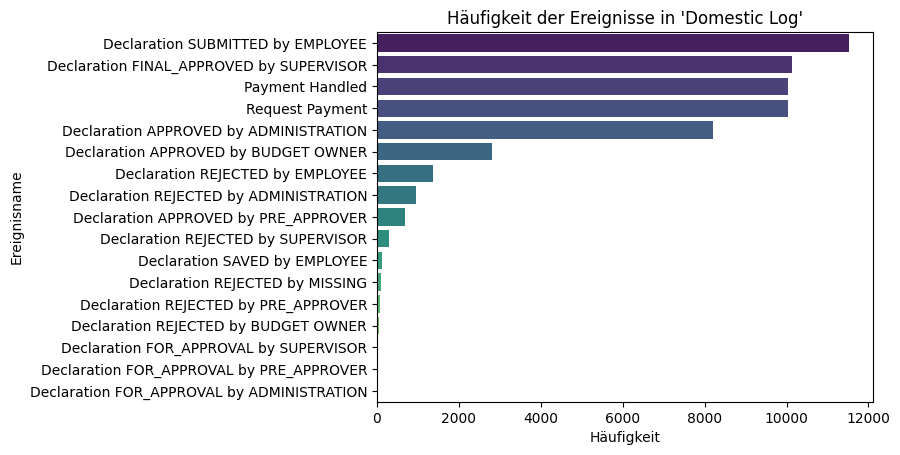

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x=event_frequencies_domestic.values, y=event_frequencies_domestic.index, palette="viridis")

# Add labels and title
plt.xlabel("Häufigkeit")
plt.ylabel("Ereignisname")
plt.title("Häufigkeit der Ereignisse in 'Domestic Log'")
plt.show()

Was sind die Start- und Endaktivitäten für **Domestic**?

In [91]:
startactivitities_log_domestic = pm4py.get_start_activities(log_domestic)
startactivitities_log_domestic

{'Declaration SUBMITTED by EMPLOYEE': 10365,
 'Declaration SAVED by EMPLOYEE': 135}

In [92]:
print(f'Es gibt im Domestic-Datensatz {len(startactivitities_log_domestic)} unterschiedliche Startaktivitäten.')

Es gibt im Domestic-Datensatz 2 unterschiedliche Startaktivitäten.


In [93]:
total_cases_startactivitities_log_domestic = sum(startactivitities_log_domestic.values())
print(f'Es gibt im Domestic-Datensatz insgesamt {(total_cases_startactivitities_log_domestic)} Prozessinstanzen.')

Es gibt im Domestic-Datensatz insgesamt 10500 Prozessinstanzen.


In [104]:
endactivities_log_domestic = pm4py.get_end_activities(log_domestic)
print(f'Es gibt im Domestic-Datensatz {len(endactivities_log_domestic)} unterschiedliche Endaktivitäten.')
print('Diese Endaktivitäten und ihre Häufigkeiten sind nachfolgend aufgeführt:')
endactivities_log_domestic

Es gibt im Domestic-Datensatz 6 unterschiedliche Endaktivitäten.
Diese Endaktivitäten und ihre Häufigkeiten sind nachfolgend aufgeführt:


{'Payment Handled': 10043,
 'Declaration SAVED by EMPLOYEE': 134,
 'Declaration REJECTED by MISSING': 30,
 'Declaration REJECTED by EMPLOYEE': 284,
 'Declaration REJECTED by ADMINISTRATION': 5,
 'Declaration REJECTED by SUPERVISOR': 4}

#### Verwendung von Process Discovery Algorithmen

In [105]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Step 1: Load the event log using a relative path
log_domestic = xes_importer.apply('Data/DomesticDeclarations.xes')

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

Visualisierung des Petrynetzes mithilfe des **Alpha Miner** Algorithmus

--> Die Visualisierung ist eher unübersichtlich und der Alpha Miner Algorithmus hat eine geringe Praxisrelevanz.

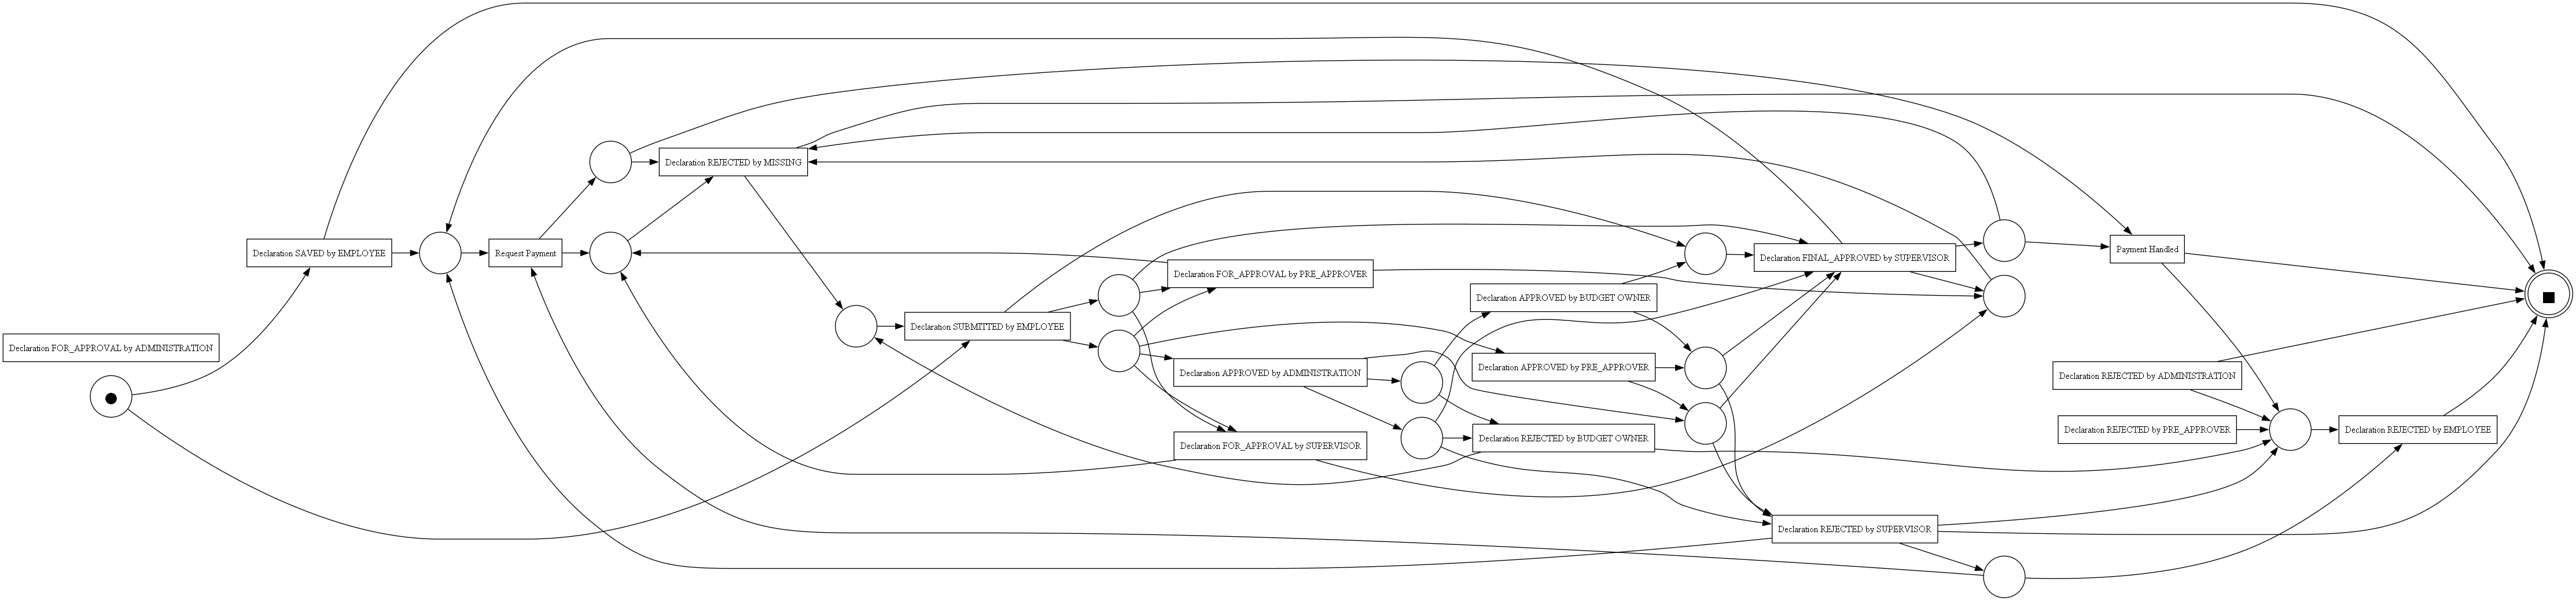

In [106]:
# Step 2: Discover the process model using the Alpha Miner algorithm
net, initial_marking, final_marking = alpha_miner.apply(log_domestic)

# Step 3: Visualize the discovered Petri net
gviz_alphaminer = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz_alphaminer)

Petri-Netz mithilfe des **Inductive Miner** Algorithmus \
--> Dieser Algorithmus gilt als praxistauglicher als der Alpha Miner.

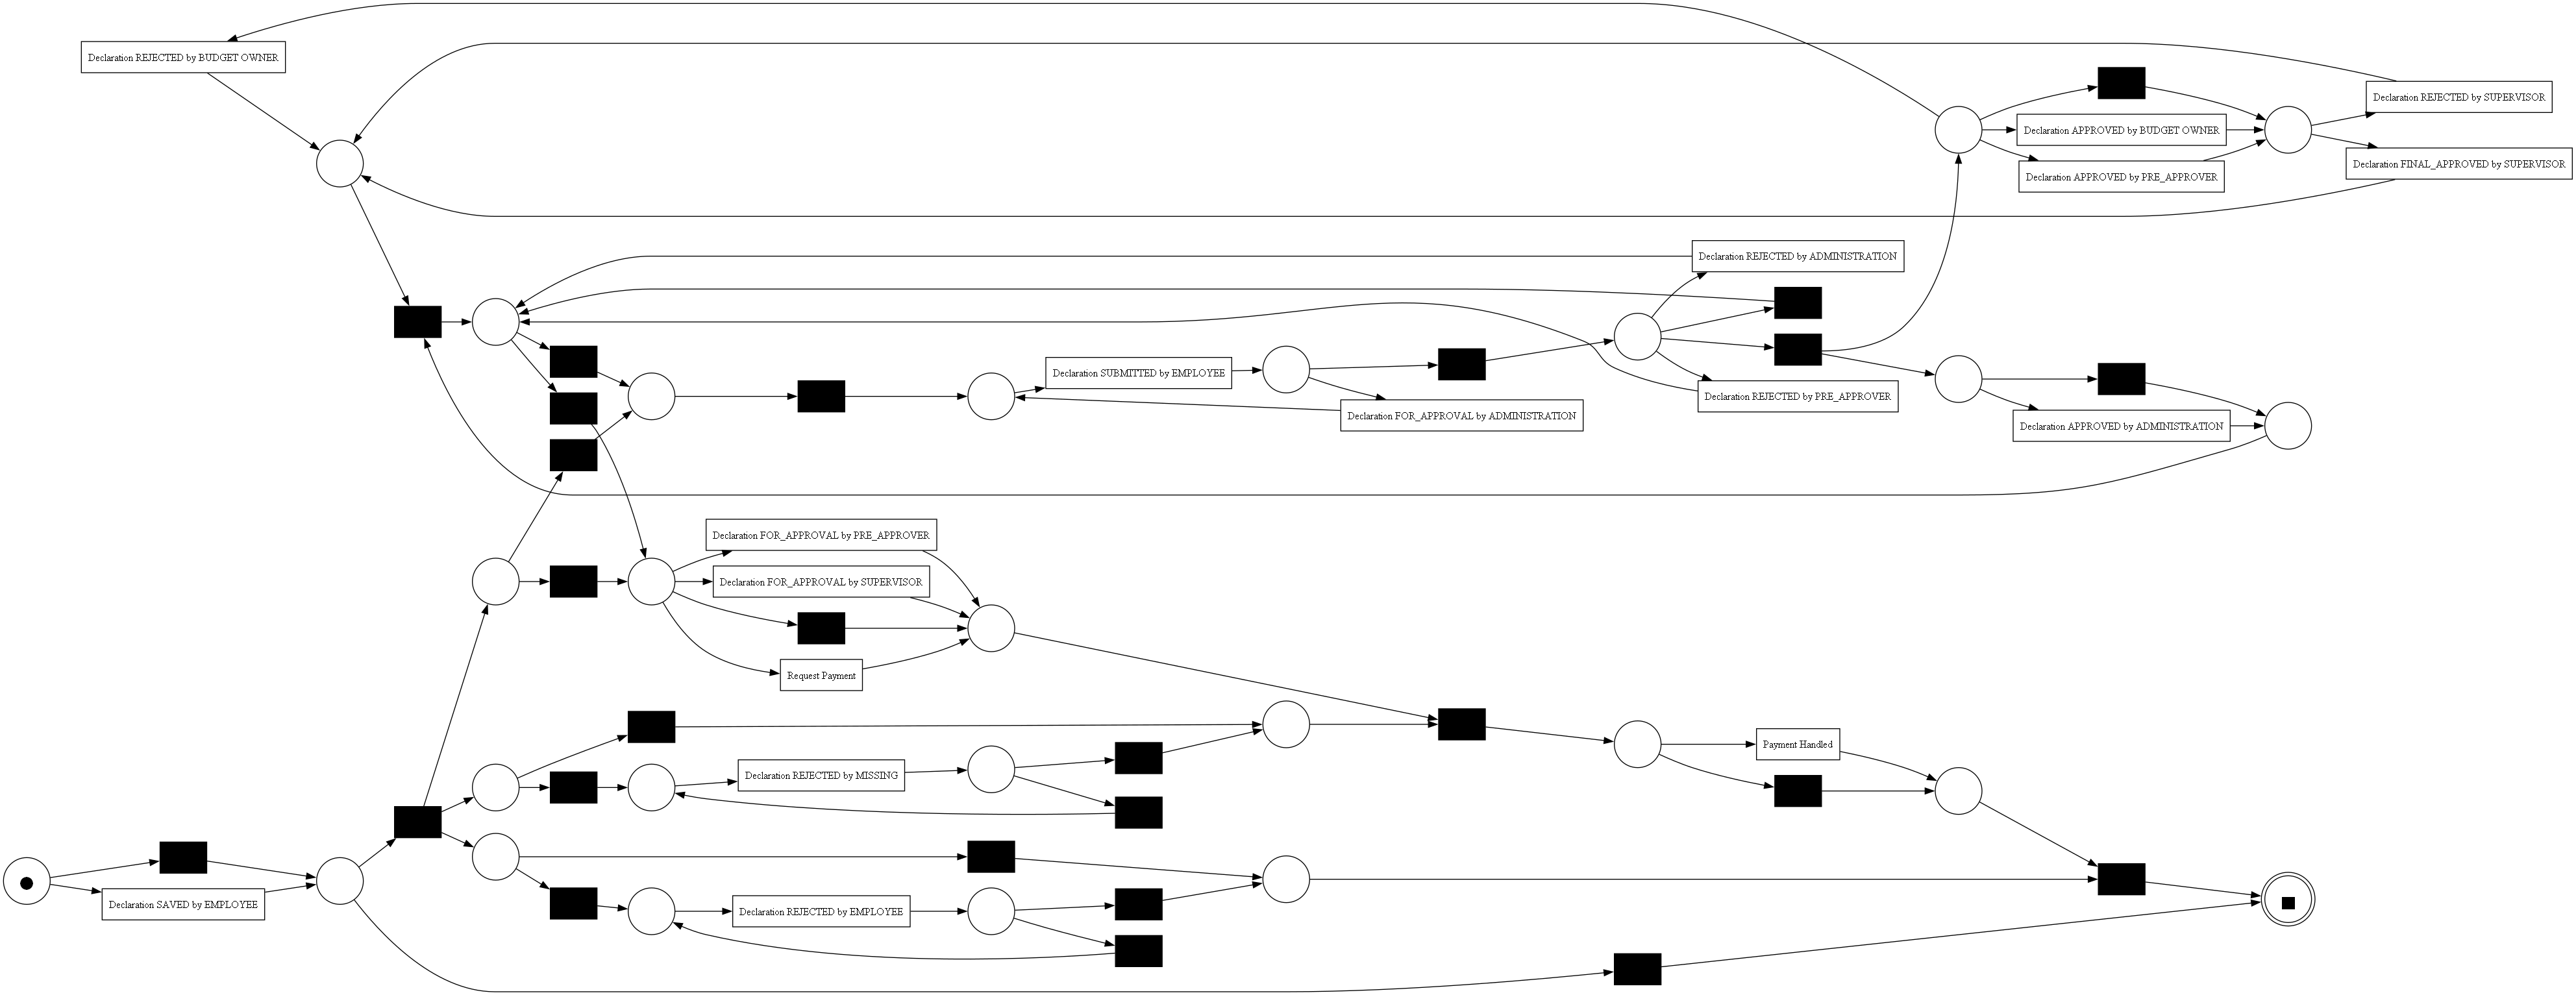

In [108]:
import pm4py
from pm4py.visualization.petri_net import visualizer as pn_vis

# Step 2: Discover the process model using the Inductive Miner algorithm
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(
    log_domestic,
    # variant="imf", 
    # noise_threshold=0.2 # A higher threshold will ignore less frequent paths in the process, which can simplify the resulting model but may omit some behavior.
    )

# Step 3: Visualize the discovered Petri net
gviz_inductive = pn_vis.apply(net, initial_marking, final_marking)
pn_vis.view(gviz_inductive)


Setzen eines Noise-thresholds, um weniger häufige Prozessvarianten auszublenden (Inductive Miner)

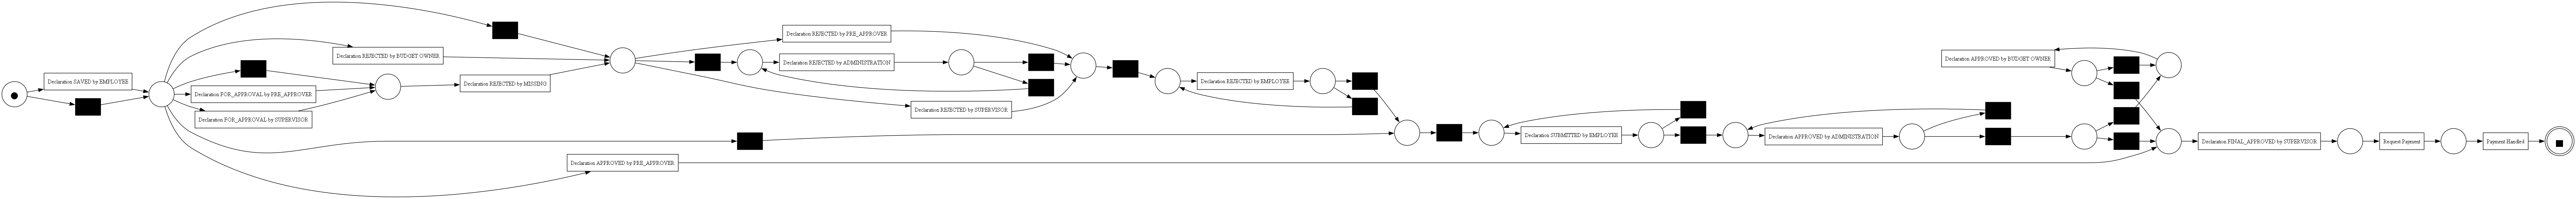

In [109]:
# Step 2: Discover the process model using the Inductive Miner algorithm
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(
    log_domestic,
    # variant="imf", 
    noise_threshold=0.2 # A higher threshold will ignore less frequent paths in the process, which can simplify the resulting model but may omit some behavior.
    )

# Step 3: Visualize the discovered Petri net
gviz_inductive = pn_vis.apply(net, initial_marking, final_marking)
pn_vis.view(gviz_inductive)

Petri-Netz mithilfe des **Heuristics Miner** Algorithmus

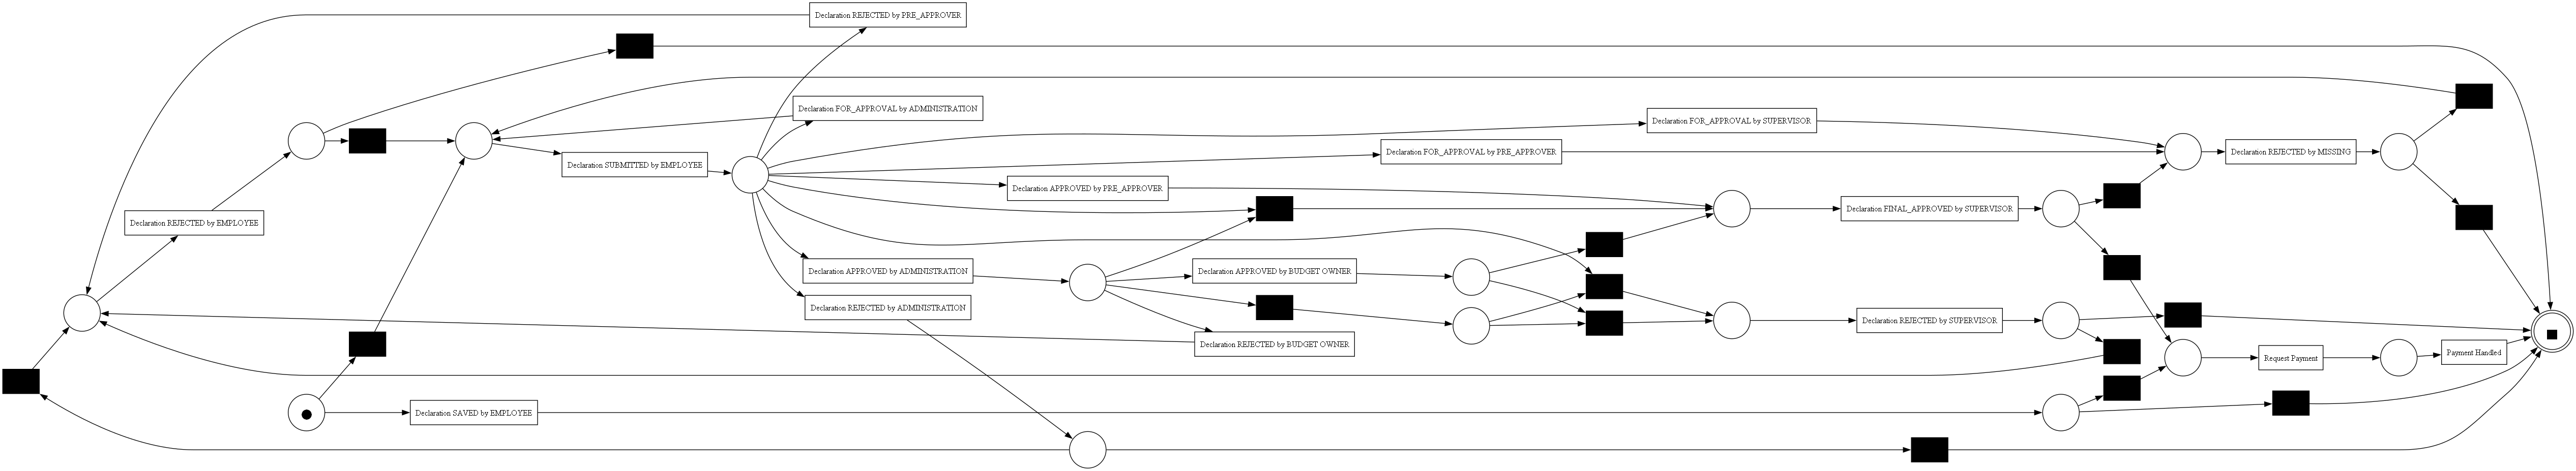

In [98]:
import pm4py
from pm4py.visualization.petri_net import visualizer as pn_vis

# Step 2: Discover the process model using the Heuristics Miner algorithm
net, initial_marking, final_marking = pm4py.discover_petri_net_heuristics(log_domestic)

# Step 3: Visualize the discovered Petri net
gviz_heuristics = pn_vis.apply(net, initial_marking, final_marking)
pn_vis.view(gviz_heuristics)


BPMN-Modell erstellen für 'domestic' Log

In [139]:
from pm4py.visualization.bpmn import visualizer as bpmn_vis

# Step 2: Discover the BPMN process model using the Inductive Miner algorithm
bpmn_model_domestic = pm4py.discover_bpmn_inductive(
    log_domestic,
    noise_threshold=0.2  # A higher threshold will ignore less frequent paths, simplifying the model
)

# Step 3: Visualize the discovered BPMN model
gviz_bpmn_domestic = bpmn_vis.apply(bpmn_model_domestic)
bpmn_vis.view(gviz_bpmn_domestic)

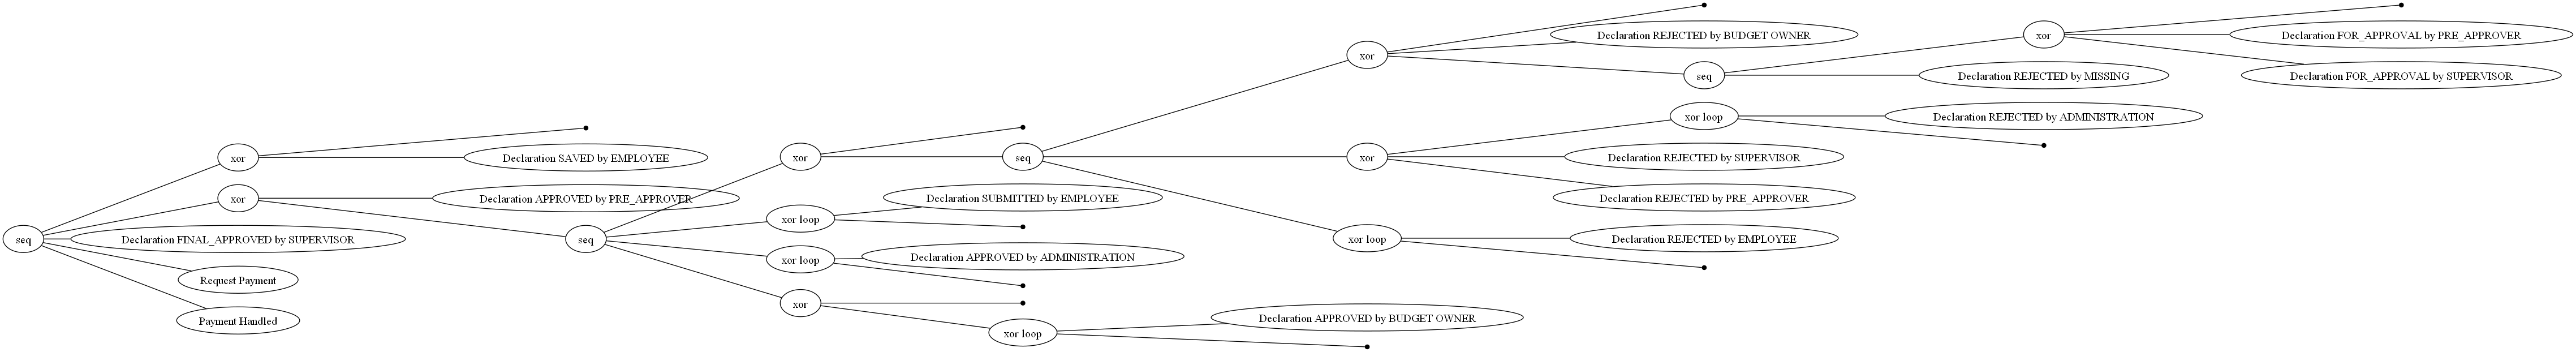

In [147]:
from pm4py.visualization.process_tree import visualizer as pt_vis

# Step 2: Discover the process tree using the Inductive Miner algorithm
process_tree_domestic = pm4py.discover_process_tree_inductive(
    log_domestic,
    noise_threshold=0.2  # A higher threshold will ignore less frequent paths, simplifying the model
)

# Step 3: Visualize the discovered process tree
gviz_tree_domestic = pt_vis.apply(process_tree_domestic)
pt_vis.view(gviz_tree_domestic)

## International Log

In [113]:
# Domestic log in ein pandas DataFrame überführen
df_international = pm4py.convert_to_dataframe(log_international)

In [116]:
print(df_domestic.shape)

(56437, 10)


In [115]:
display(df_international)

id  org:resource  \
0      rv_travel permit 76455_6  STAFF MEMBER   
1      rv_travel permit 76455_7  STAFF MEMBER   
2               st_step 76459_0  STAFF MEMBER   
3               st_step 76460_0  STAFF MEMBER   
4               st_step 76461_0  STAFF MEMBER   
...                         ...           ...   
72146           st_step 13239_0  STAFF MEMBER   
72147           st_step 13241_0  STAFF MEMBER   
72148           st_step 13240_0  STAFF MEMBER   
72149  rv_travel permit 13226_6  STAFF MEMBER   
72150  rv_travel permit 13226_7  STAFF MEMBER   

                                 concept:name            time:timestamp  \
0                                  Start trip 2016-10-05 00:00:00+00:00   
1                                    End trip 2016-10-05 00:00:00+00:00   
2                Permit SUBMITTED by EMPLOYEE 2017-04-06 13:32:10+00:00   
3         Permit FINAL_APPROVED by SUPERVISOR 2017-04-06 13:32:28+00:00   
4           Declaration SUBMITTED by EMPLOYEE 2017-04-07 13:38:14+00:00   
...                                       ...                       ...   
72146       Declaration SUBMITTED by EMPLOYEE 2018-12-18 15:06:50+00:00   
72147  Declaration REJECTED by ADMINISTRATION 2018-12-18 15:06:57+00:00   
72148        Declaration REJECTED by EMPLOYEE 2018-12-19 14:05:36+00:00   
72149                              Start trip 2019-02-19 00:00:00+00:00   
72150                                End trip 2019-02-24 00:00:00+00:00   

             org:role case:Permit travel permit number  \
0            EMPLOYEE       travel permit number 76456   
1            EMPLOYEE       travel permit number 76456   
2            EMPLOYEE       travel permit number 76456   
3          SUPERVISOR       travel permit number 76456   
4            EMPLOYEE       travel permit number 76456   
...               ...                              ...   
72146        EMPLOYEE       travel permit number 13227   
72147  ADMINISTRATION       travel permit number 13227   
72148        EMPLOYEE       travel permit number 13227   
72149        EMPLOYEE       travel permit number 13227   
72150        EMPLOYEE       travel permit number 13227   

         case:DeclarationNumber  case:Amount  case:RequestedAmount  \
0      declaration number 76458    39.664561             39.664561   
1      declaration number 76458    39.664561             39.664561   
2      declaration number 76458    39.664561             39.664561   
3      declaration number 76458    39.664561             39.664561   
4      declaration number 76458    39.664561             39.664561   
...                         ...          ...                   ...   
72146                   UNKNOWN     0.000000              0.000000   
72147                   UNKNOWN     0.000000              0.000000   
72148                   UNKNOWN     0.000000              0.000000   
72149                   UNKNOWN     0.000000              0.000000   
72150                   UNKNOWN     0.000000              0.000000   

      case:Permit TaskNumber  ...  case:concept:name  \
0                    UNKNOWN  ...  declaration 76457   
1                    UNKNOWN  ...  declaration 76457   
2                    UNKNOWN  ...  declaration 76457   
3                    UNKNOWN  ...  declaration 76457   
4                    UNKNOWN  ...  declaration 76457   
...                      ...  ...                ...   
72146               task 427  ...  declaration 13232   
72147               task 427  ...  declaration 13232   
72148               task 427  ...  declaration 13232   
72149               task 427  ...  declaration 13232   
72150               task 427  ...  declaration 13232   

       case:Permit OrganizationalEntity   case:travel permit number  \
0             organizational unit 65458  travel permit number 76456   
1             organizational unit 65458  travel permit number 76456   
2             organizational unit 65458  travel permit number 76456   
3             organizational unit 65458  tra

In [118]:
print(df_international.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72151 entries, 0 to 72150
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   id                                72151 non-null  object             
 1   org:resource                      72151 non-null  object             
 2   concept:name                      72151 non-null  object             
 3   time:timestamp                    72151 non-null  datetime64[ns, UTC]
 4   org:role                          72151 non-null  object             
 5   case:Permit travel permit number  72151 non-null  object             
 6   case:DeclarationNumber            72151 non-null  object             
 7   case:Amount                       72151 non-null  float64            
 8   case:RequestedAmount              72151 non-null  float64            
 9   case:Permit TaskNumber            72151 non-null  object     

In [119]:
print(df_international["concept:name"].unique())

['Start trip' 'End trip' 'Permit SUBMITTED by EMPLOYEE'
 'Permit FINAL_APPROVED by SUPERVISOR' 'Declaration SUBMITTED by EMPLOYEE'
 'Declaration FINAL_APPROVED by SUPERVISOR' 'Request Payment'
 'Payment Handled' 'Permit APPROVED by SUPERVISOR'
 'Permit FINAL_APPROVED by DIRECTOR'
 'Declaration APPROVED by PRE_APPROVER'
 'Declaration APPROVED by ADMINISTRATION'
 'Permit APPROVED by PRE_APPROVER' 'Declaration REJECTED by PRE_APPROVER'
 'Declaration REJECTED by EMPLOYEE' 'Declaration SAVED by EMPLOYEE'
 'Declaration REJECTED by MISSING' 'Permit REJECTED by MISSING'
 'Declaration REJECTED by SUPERVISOR' 'Declaration APPROVED by SUPERVISOR'
 'Declaration FINAL_APPROVED by DIRECTOR'
 'Permit REJECTED by PRE_APPROVER' 'Permit REJECTED by EMPLOYEE'
 'Declaration REJECTED by DIRECTOR' 'Permit REJECTED by SUPERVISOR'
 'Permit APPROVED by ADMINISTRATION' 'Send Reminder'
 'Declaration APPROVED by BUDGET OWNER'
 'Declaration REJECTED by ADMINISTRATION'
 'Permit APPROVED by BUDGET OWNER' 'Permit REJ

Wie häufig kommt welches Event vor im Log für 'international'?

In [122]:
# Calculate the frequency of each event
event_frequencies_international = df_international["concept:name"].value_counts()

# Display the frequencies
print(event_frequencies_international)

concept:name
Declaration SUBMITTED by EMPLOYEE           8099
Start trip                                  6449
End trip                                    6449
Permit SUBMITTED by EMPLOYEE                6255
Payment Handled                             6187
Request Payment                             6183
Declaration FINAL_APPROVED by SUPERVISOR    6039
Permit FINAL_APPROVED by SUPERVISOR         5381
Declaration APPROVED by ADMINISTRATION      5037
Permit APPROVED by ADMINISTRATION           4839
Declaration APPROVED by BUDGET OWNER        1834
Declaration REJECTED by EMPLOYEE            1780
Permit APPROVED by BUDGET OWNER             1763
Declaration REJECTED by ADMINISTRATION      1549
Permit APPROVED by SUPERVISOR                641
Permit FINAL_APPROVED by DIRECTOR            640
Declaration APPROVED by PRE_APPROVER         612
Permit APPROVED by PRE_APPROVER              534
Send Reminder                                434
Declaration APPROVED by SUPERVISOR           256
Declara

C:\Users\flemm\AppData\Local\Temp\ipykernel_6340\4898688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_frequencies_international.values, y=event_frequencies_international.index, palette="viridis")


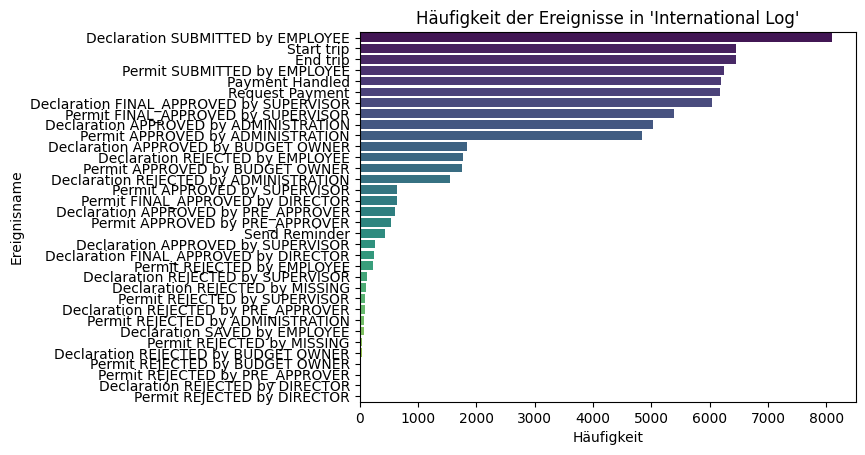

In [148]:
# Create the bar plot
sns.barplot(x=event_frequencies_international.values, y=event_frequencies_international.index, palette="viridis")

# Add labels and title
plt.xlabel("Häufigkeit")
plt.ylabel("Ereignisname")
plt.title("Häufigkeit der Ereignisse in 'International Log'")
plt.show()

Start- und Enderergnisse im international Log

In [125]:
startactivitities_log_international = pm4py.get_start_activities(log_international)
startactivitities_log_international

{'Start trip': 740,
 'Declaration SUBMITTED by EMPLOYEE': 407,
 'Permit SUBMITTED by EMPLOYEE': 5294,
 'Declaration SAVED by EMPLOYEE': 8}

In [127]:
endactivitities_log_international = pm4py.get_end_activities(log_international)
endactivitities_log_international

{'Payment Handled': 5646,
 'End trip': 593,
 'Declaration SAVED by EMPLOYEE': 54,
 'Permit REJECTED by MISSING': 8,
 'Declaration REJECTED by MISSING': 11,
 'Declaration REJECTED by EMPLOYEE': 130,
 'Declaration FINAL_APPROVED by SUPERVISOR': 1,
 'Send Reminder': 2,
 'Request Payment': 3,
 'Declaration REJECTED by SUPERVISOR': 1}

Alpha-Miner (Full)

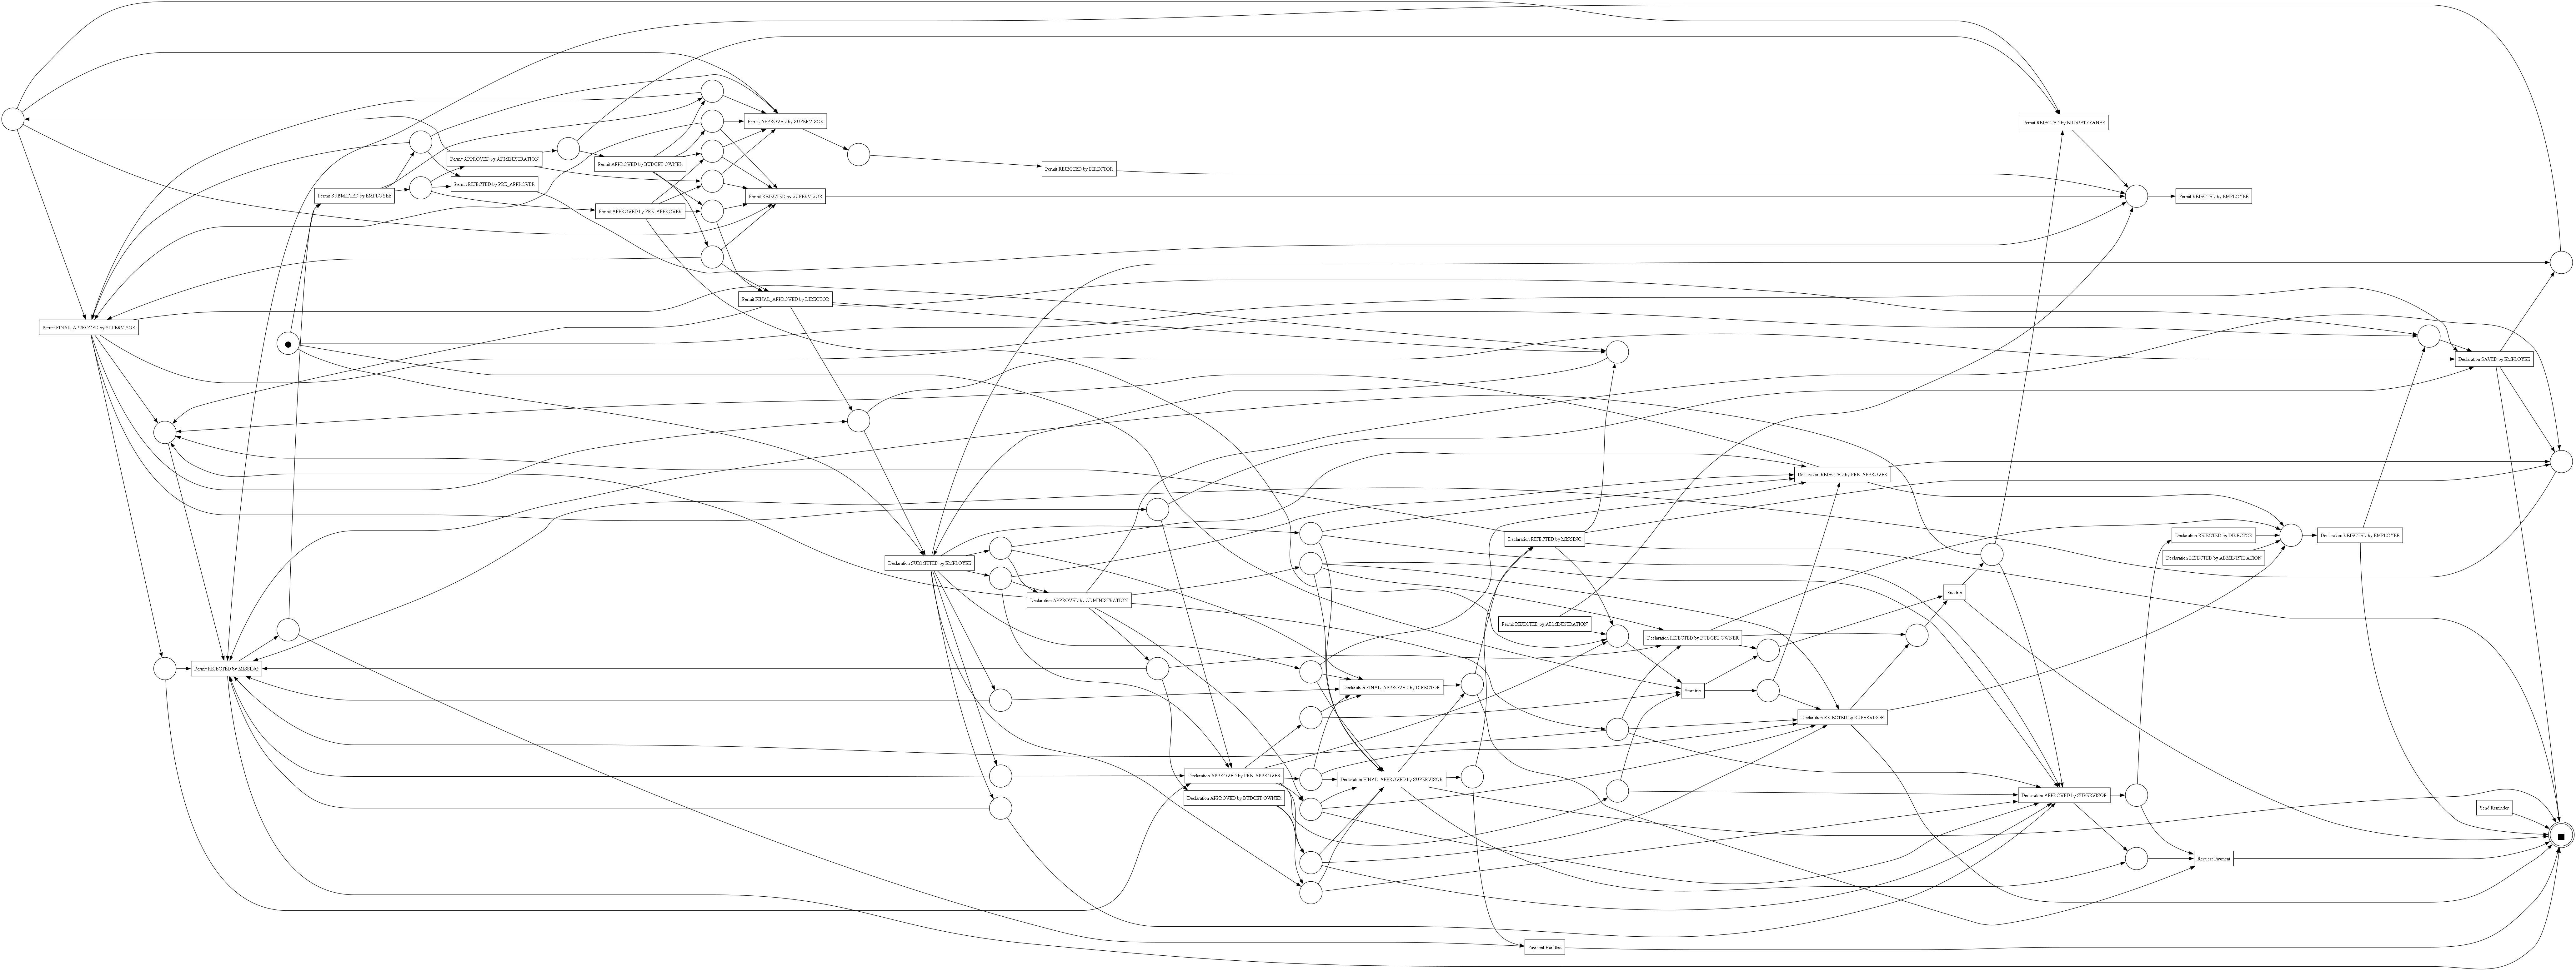

In [100]:
# Step 2: Discover the process model using the Alpha Miner algorithm
net, initial_marking, final_marking = alpha_miner.apply(log_international)

# Step 3: Visualize the discovered Petri net
gviz_alphaminer = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz_alphaminer)

**Inductive Miner** auf Log International anwenden

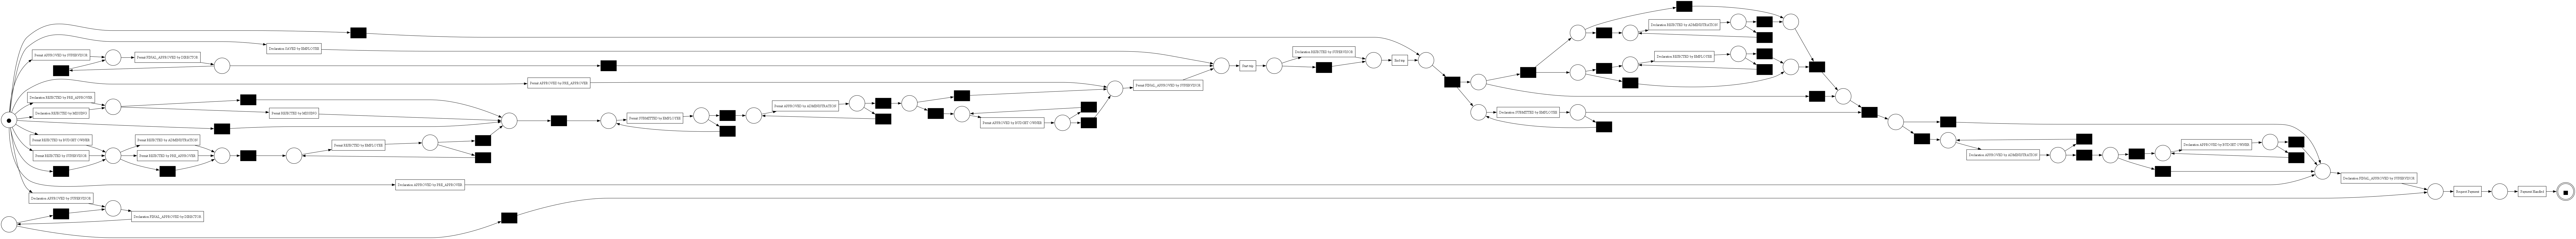

In [101]:
import pm4py
from pm4py.visualization.petri_net import visualizer as pn_vis

# Step 2: Discover the process model using the Inductive Miner algorithm
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(
    log_international,
    # variant="imf", 
    noise_threshold=0.2 # A higher threshold will ignore less frequent paths in the process, which can simplify the resulting model but may omit some behavior.
    )

# Step 3: Visualize the discovered Petri net
gviz_inductive = pn_vis.apply(net, initial_marking, final_marking)
pn_vis.view(gviz_inductive)

BPMN-Modell erstellen für 'international' Log

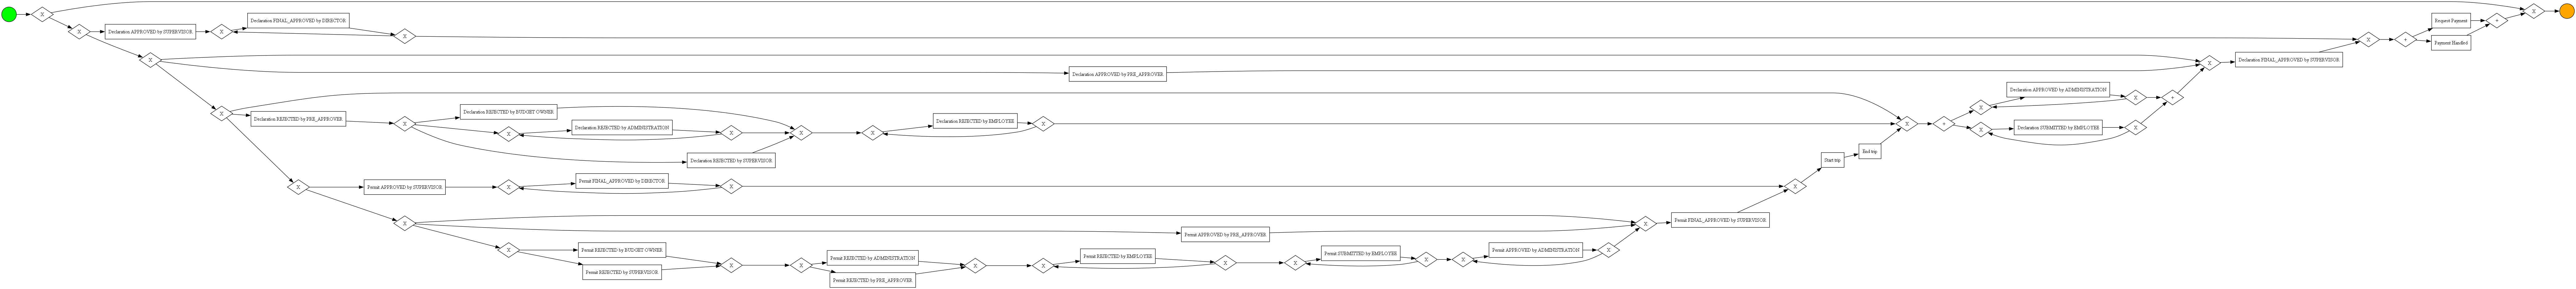

In [141]:
from pm4py.visualization.bpmn import visualizer as bpmn_vis

# Step 2: Discover the BPMN process model using the Inductive Miner algorithm
bpmn_model_international = pm4py.discover_bpmn_inductive(
    log_international,
    noise_threshold=0.99  # A higher threshold will ignore less frequent paths, simplifying the model
)

# Step 3: Visualize the discovered BPMN model
gviz_bpmn_international = bpmn_vis.apply(bpmn_model_international)
bpmn_vis.view(gviz_bpmn_international)


Process Tree erstellen für 'international'

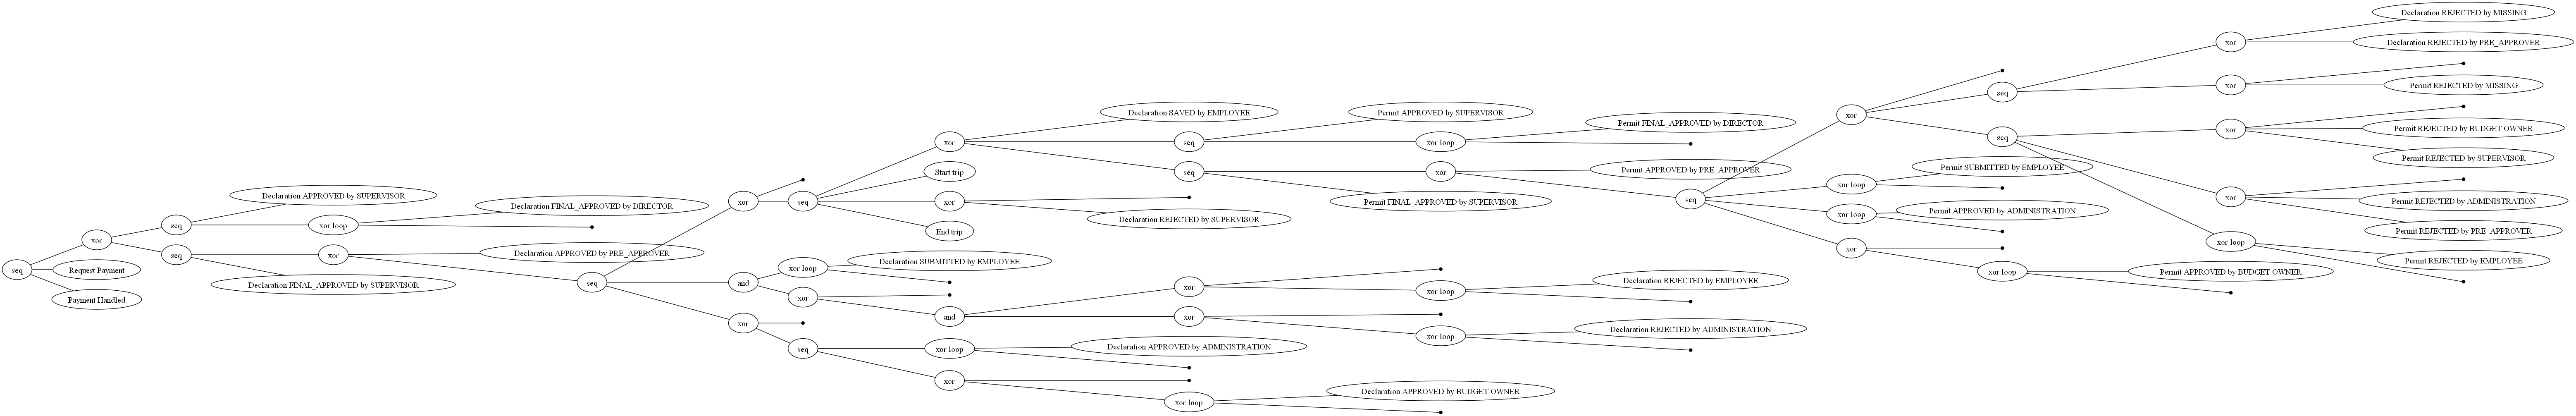

In [144]:
from pm4py.visualization.process_tree import visualizer as pt_vis

# Step 2: Discover the process tree using the Inductive Miner algorithm
process_tree_international = pm4py.discover_process_tree_inductive(
    log_international,
    noise_threshold=0.2  # A higher threshold will ignore less frequent paths, simplifying the model
)

# Step 3: Visualize the discovered process tree
gviz_tree_international = pt_vis.apply(process_tree_international)
pt_vis.view(gviz_tree_international)